# 

## PCA AND T-SNE

-  PCA (Principle Component Analysis):-  Dimensionality reduction
   
       a.Here we converted 784-dim into 2-dim
       b. dim 3 >> PCA

# MNIST Database
-  Handwritten digits
-  28 X 28
-  60K Training datapoints
-  10K Test datapoints



## Identifying handwritten images


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##df= pd.read_csv("mnist_train.csv")

In [7]:
##df.head()

In [5]:
df= pd.read_csv("train.csv")

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(42000, 785)

In [14]:
df.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
l=df["label"]

In [21]:
d=df.drop("label",axis=1)
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(42000, 785)

In [23]:
d.shape

(42000, 784)

In [28]:
l.shape

(42000,)

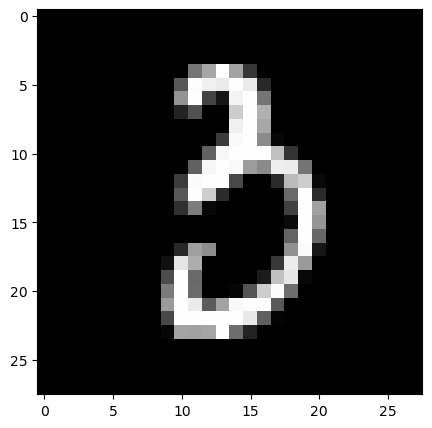

In [34]:
## number display
plt.figure(figsize=(5,5))
idx = 150

# Use .values to get the NumPy array representation
grid_data = d.iloc[idx].values.reshape(28, 28)       ## reshaping:: 1D to 2D

plt.imshow(grid_data, interpolation='none', cmap="gray")
plt.show()

#imshow--- image show
## cmap--color map

In [36]:
## visualization using PCA

labels =l.head(15000)
data=d.head(15000)
data.shape

(15000, 784)

In [38]:
# Data preprocessing
## mean of 0 and a standard deviation of 1...PCA

from sklearn.preprocessing import StandardScaler

stand_data = StandardScaler().fit_transform(data)
print(stand_data.shape)

(15000, 784)


In [40]:
sample_data= stand_data

# matrix multiplication
covar_matrix = np.matmul(sample_data.T, sample_data)
covar_matrix.shape  ## co-variance -(A^T * A)

(784, 784)

In [42]:
## eigen values

from scipy.linalg import eigh  ##return eigen values (in asending order) and matrix

values,vectors=eigh(covar_matrix, eigvals=(782,783))
vectors.shape
### shape of eigen values

C:\Users\bu23957\AppData\Local\Temp\ipykernel_19928\1313564794.py:5: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values,vectors=eigh(covar_matrix, eigvals=(782,783))


(784, 2)

In [45]:
vectors= vectors.T
vectors.shape  ## shape of updated  eigen values

(2, 784)

In [57]:
import matplotlib.pyplot as plt
new_coord= np.matmul(vectors,sample_data.T)
print("new data points shape:" ,vectors.shape, "X", sample_data.T.shape,"=", new_coord.shape)

new data points shape: (2, 784) X (784, 15000) = (2, 15000)


In [72]:
import pandas as pd
import numpy as np

# Assuming 'new_coord' has shape (15000, 2) and 'labels' has shape (15000,)
new_coord_resized = np.resize(new_coord, (15000, 2))

# Stack 'new_coord_resized' and 'labels' vertically
stacked_data = np.column_stack((new_coord_resized, labels))

# Create a DataFrame
columns = ["1st_principal", "2nd_principal", "label"]
dataframe = pd.DataFrame(data=stacked_data, columns=columns)

# Display the first few rows of the DataFrame
dataframe.head()


,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,1.000000,1.000000,0.0
2,1.000000,1.000000,1.0
3,1.000000,1.000000,4.0
4,1.000000,6.193635,0.0


C:\Users\bu23957\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


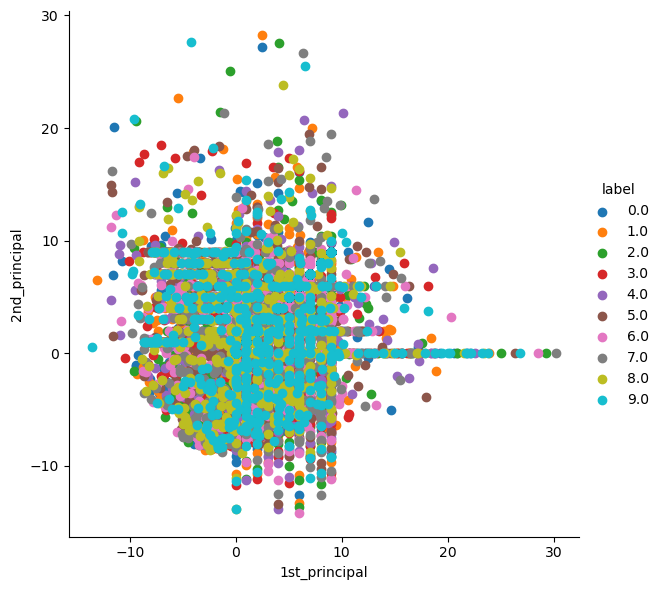

In [76]:
import seaborn as sn
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your DataFrame with columns '1st_principal', '2nd_principal', and 'label'
sn.FacetGrid(dataframe, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


## PCA using Scikit-Learn

In [77]:
from sklearn import decomposition
pca=decomposition.PCA()

In [78]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

C:\Users\bu23957\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


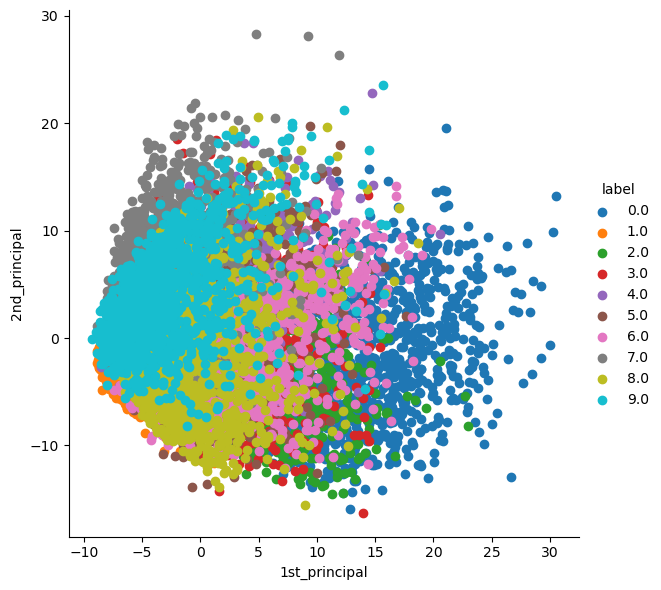

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pca_data' has nine principal components and 'labels' is a Pandas Series
# Keep only the first two principal components
pca_data_subset = pca_data[:, :2]

# Convert the Pandas Series 'labels' to a NumPy array
labels_array = labels.to_numpy()

# Stack the principal components and labels horizontally
pca_data_with_labels = np.hstack((pca_data_subset, labels_array.reshape(-1, 1)))

# Create a DataFrame with '1st_principal', '2nd_principal', and 'label'
columns = ["1st_principal", "2nd_principal", "label"]
pca_df = pd.DataFrame(data=pca_data_with_labels, columns=columns)

# Visualize the data using Seaborn
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
